# :oncoming_automobile: Car Price Analytics
## 02 Initial EDA

|Field|Description|
|-----|-----------|
|**Author:** |Robert Steven Elliott|
|**Course:** |Code Institute – Data Analytics with AI Bootcamp|
|**Project Type:** |Hakathon 1|
|**Team Name:** | tbc |
|**Date:** | November 2025| 

---
### Objectives
- Conduct exploratory data analysis (EDA) to uncover trends and patterns.
- Produce static visualisations using Matplotlib and Seaborn.
### Inputs
`data/cleaned/car_prices.csv`
### Outputs
- Static and visualisations saved to `figures/` for README

### Additional Comments
Run after `02_cleaning_and_transformation.ipynb`.

---

## Ignore Warnings

In [1]:
import warnings # Import the warnings module to manage warning messages
warnings.simplefilter(action='ignore', category=FutureWarning) # Ignore FutureWarning messages

---

## Change Working Directory

In [2]:
import os # Import the os module to interact with the operating system
PROJECT_ROOT = os.path.join(os.getcwd(), "..") # Define the project root directory
os.chdir(PROJECT_ROOT) # Change the current working directory to the project root
print("✅ Working directory set to project root:", os.getcwd()) # Confirmation message

✅ Working directory set to project root: /home/robert/Projects/Car-Price-Analytics


---

## Import Libraries and Dataset

In [3]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set_theme(style="whitegrid")

df = pd.read_csv("data/cleaned/car_prices.csv")
print("✅ Data loaded successfully.")
df.head()

✅ Data loaded successfully.


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,manufacturer
0,3,petrol,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,petrol,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,petrol,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,petrol,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,petrol,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


### Explanation:
This section imports the necessary Python libraries and loads the final dataset created during the ETL process. The first few rows confirm the dataset’s structure and variable names.

---

## Data Type Restoration

when loading from CSV, categorical columns (sex, smoker, region, bmi_category,age_group,family_size_category) were re-cast to the category dtype to maintain consistency with the ETL pipeline and improve plotting performance.

In [4]:
categorical_columns = df.select_dtypes(include=['object']).columns # Identify categorical columns
for col in categorical_columns: # Re-cast each categorical column to 'category' dtype
    df[col] = df[col].astype('category') # Convert to category dtype
print("✅ Data types after restoration:") # Confirmation message
print(df.dtypes) # Display the data types of all columns

✅ Data types after restoration:
symboling              int64
fueltype            category
aspiration          category
doornumber          category
carbody             category
drivewheel          category
enginelocation      category
wheelbase            float64
carlength            float64
carwidth             float64
carheight            float64
curbweight             int64
enginetype          category
cylindernumber      category
enginesize             int64
fuelsystem          category
boreratio            float64
stroke               float64
compressionratio     float64
horsepower             int64
peakrpm                int64
citympg                int64
highwaympg             int64
price                float64
manufacturer        category
dtype: object


---

## Overview of Dataset

In [5]:
df.describe(include='all')

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,manufacturer
count,205.000000,205,205,205,205,205,205,205.000000,205.000000,205.000000,205.000000,205.000000,205,205,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205
unique,NaN,2,2,2,5,3,2,NaN,NaN,NaN,NaN,NaN,7,7,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
top,NaN,petrol,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,toyota
freq,NaN,185,168,115,96,120,202,NaN,NaN,NaN,NaN,NaN,148,159,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,174.049268,65.907805,53.724878,2555.565854,NaN,NaN,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,12.337289,2.145204,2.443522,520.680204,NaN,NaN,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,64.100000,52.000000,2145.000000,NaN,NaN,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,NaN,NaN,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.100000,66.900000,55.500000,2935.000000,NaN,NaN,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000,NaN


---

## General Distribution of Numeric Features

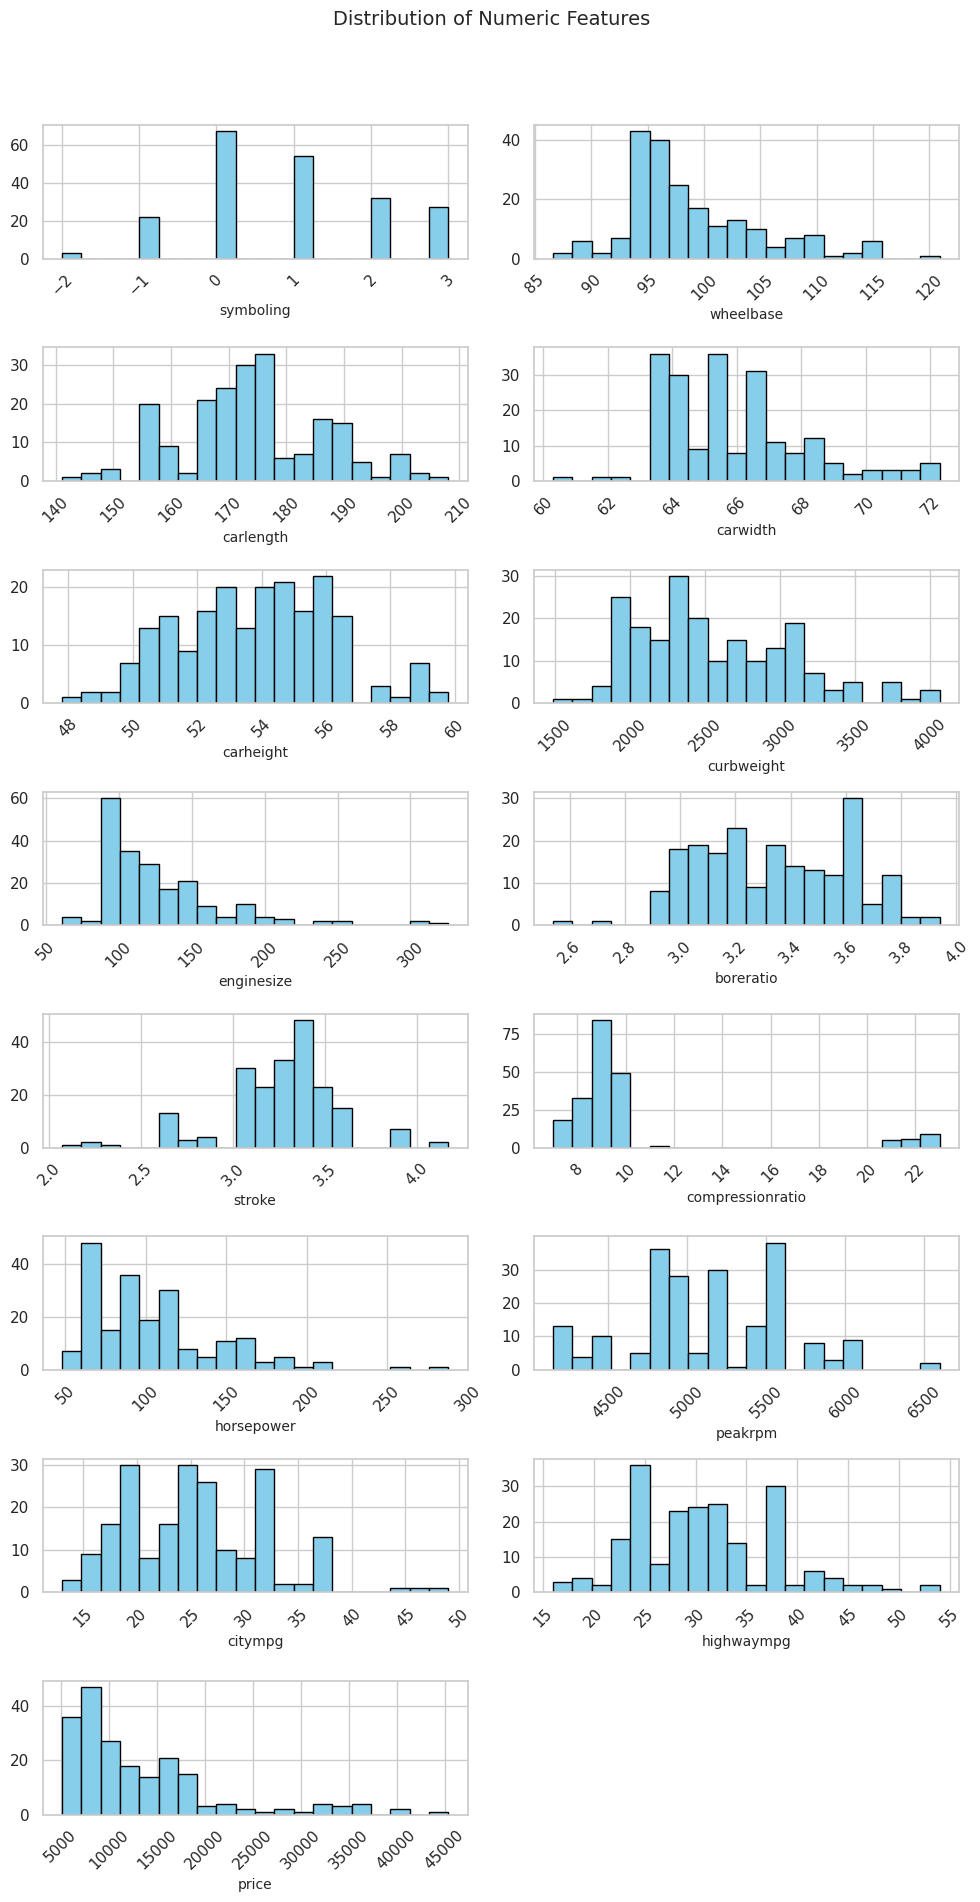

In [18]:
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist() # Identify numeric features

# Define grid size
ncols = 2
nrows = math.ceil(len(numeric_features) / ncols)

# Create histograms
axes = df[numeric_features].hist(
    bins=20, 
    figsize=(10, 20), 
    layout=(nrows, ncols),
    color='skyblue', 
    edgecolor='black'
)

# Rotate tick values and tidy up
for ax_row in axes:
    for ax in ax_row:
        ax.tick_params(axis='x', rotation=45)   # Rotate x-axis tick labels
        ax.tick_params(axis='y', rotation=0)    # Keep y-axis ticks horizontal
        ax.set_xlabel(ax.get_title(), fontsize=10)
        ax.set_title("")  # Remove redundant auto titles

plt.suptitle("Distribution of Numeric Features", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("figures/histograms_numeric_features.png", dpi=300)
plt.show()

---

## Outlier Detection with Boxplots


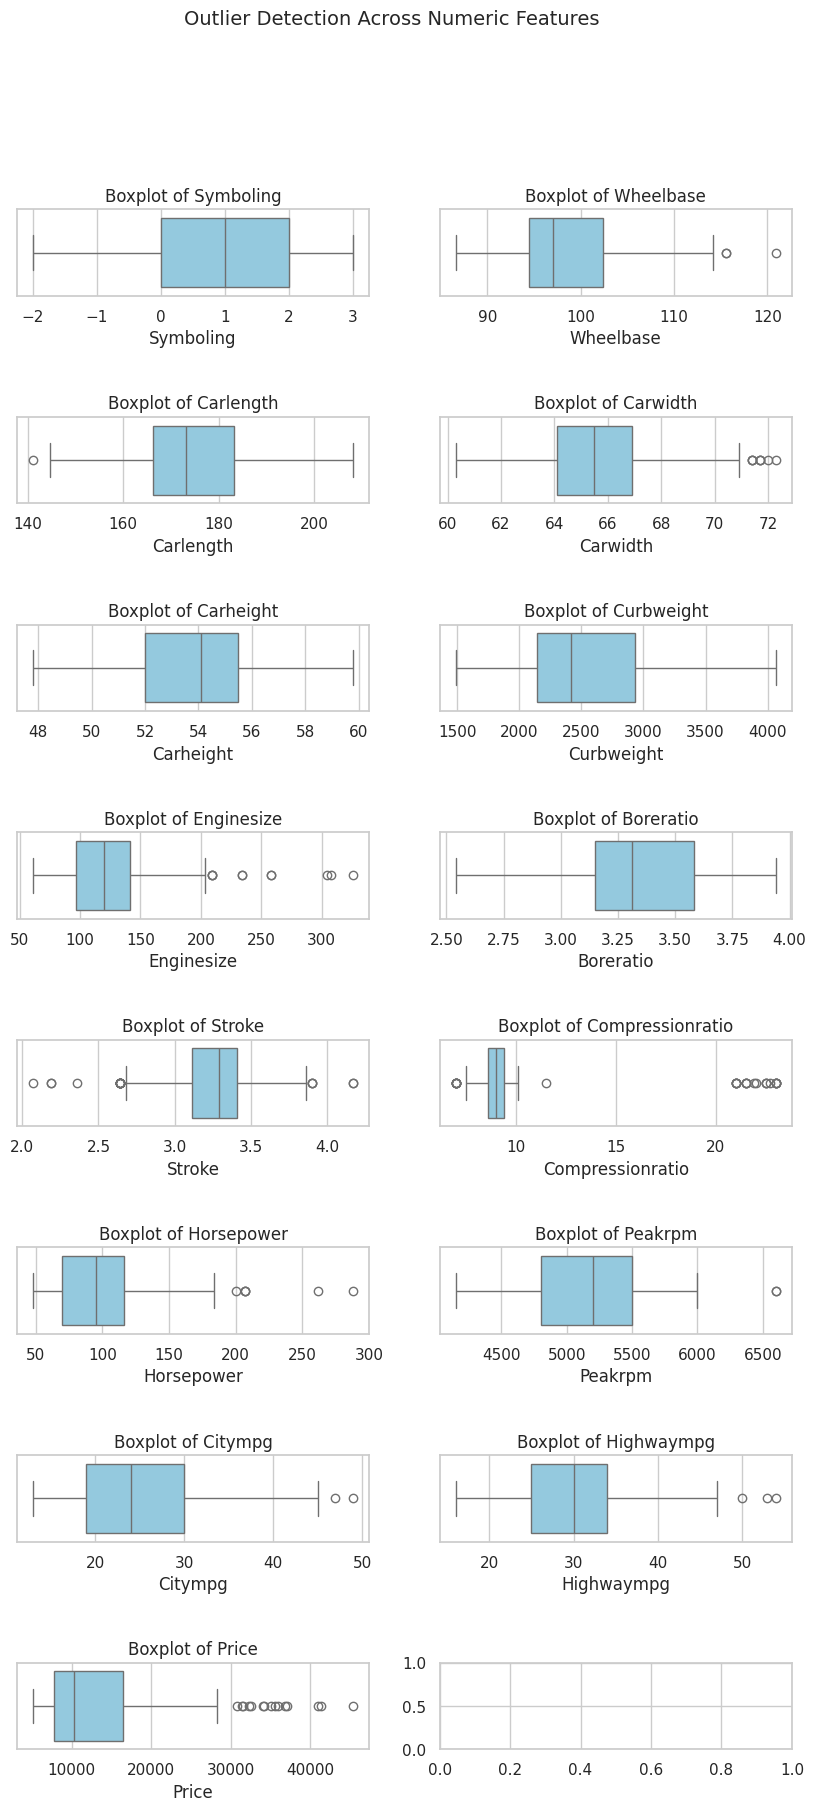

In [12]:
ncols = 2
nrows = math.ceil(len(numeric_features) / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 20))
axes = axes.flatten()

for i, col in enumerate(numeric_features):
    sns.boxplot(x=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f"Boxplot of {col.capitalize()}")
    axes[i].set_xlabel(col.capitalize())
plt.subplots_adjust(hspace=1.4)
plt.suptitle("Outlier Detection Across Numeric Features", fontsize=14)
plt.savefig("figures/boxplots_numeric_features.png")
plt.show()

---

## Categorical Feature Distributions


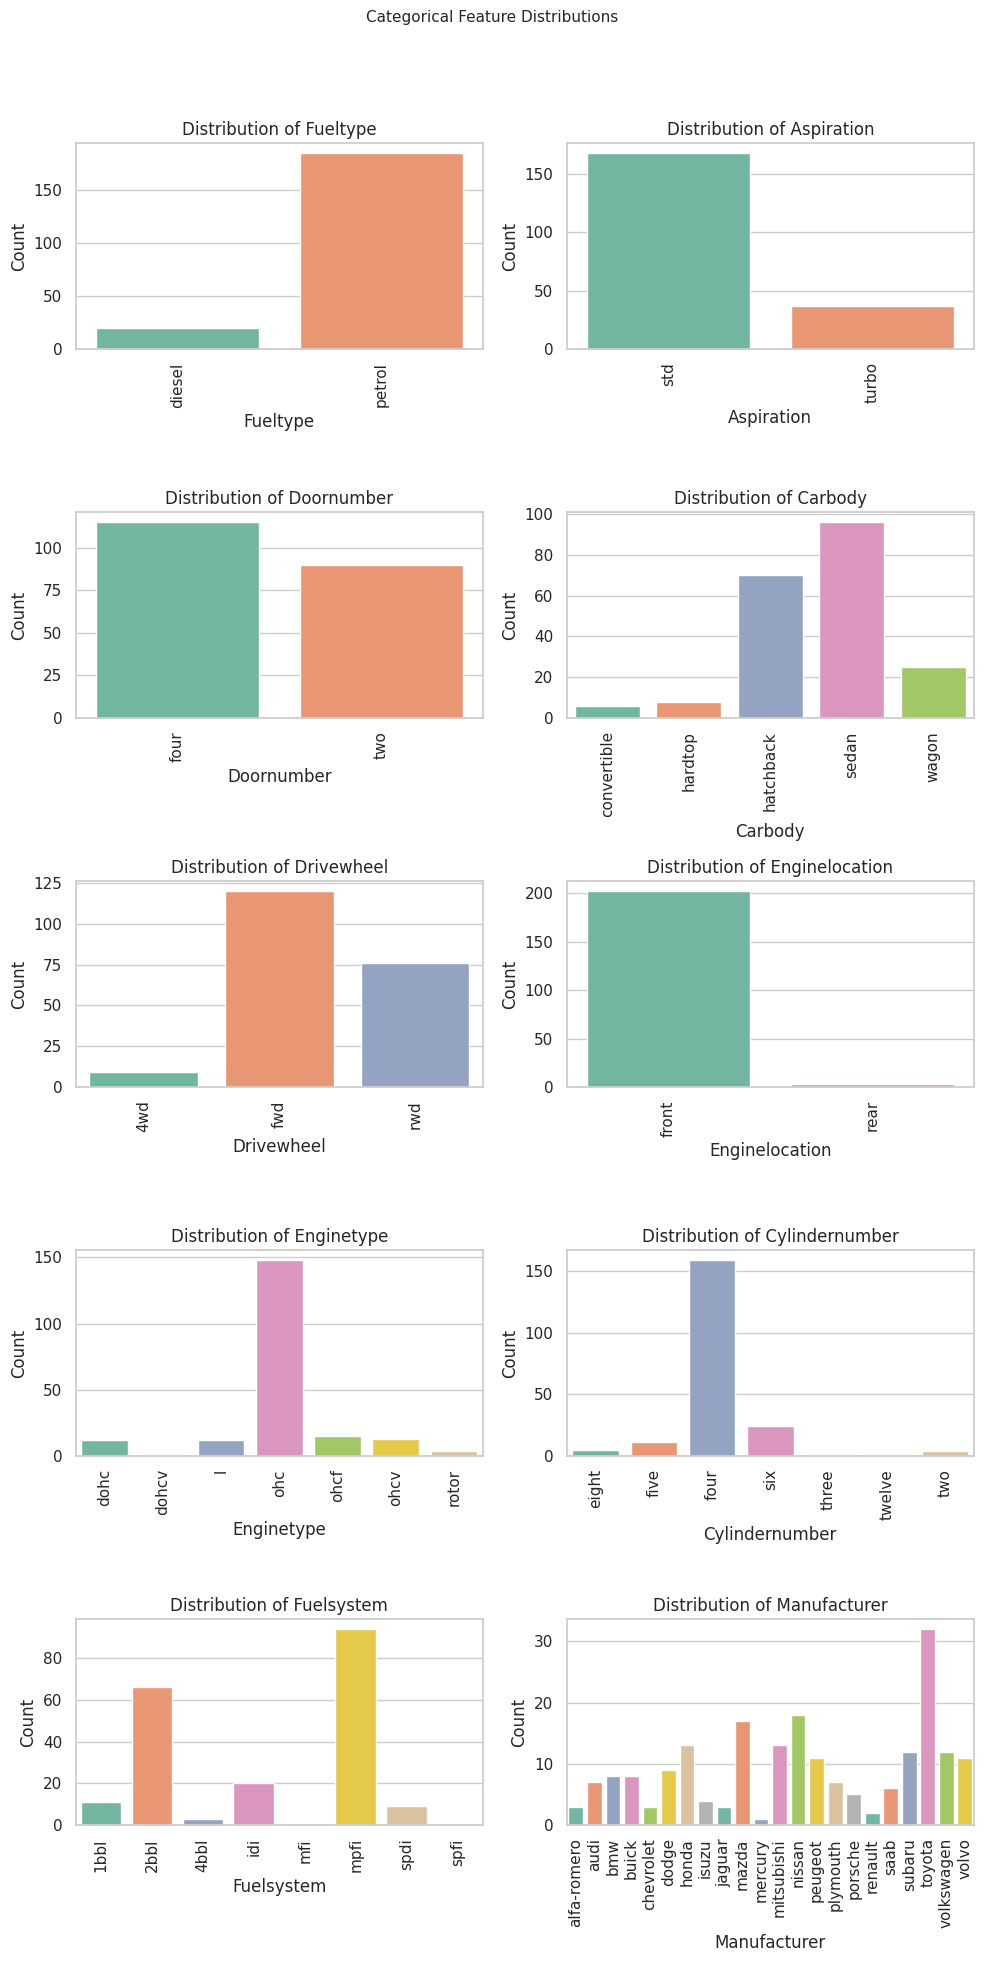

In [14]:
# Select categorical columns
categorical_features = df.select_dtypes(include=['category']).columns.tolist()

# Set the overall style and figure size
n_cols = 2
n_rows = math.ceil(len(categorical_features) / n_cols)

sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

# If there’s only one categorical feature, axes won't be iterable
if len(categorical_features) == 1:
    axes = [axes]

# Create barplots for each categorical feature
for ax, col in zip(axes, categorical_features):
    sns.countplot(data=df, x=col, ax=ax, palette="Set2")
    ax.set_title(f"Distribution of {col.capitalize()}", fontsize=12)
    ax.set_xlabel(col.capitalize())
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=90)

plt.suptitle("Categorical Feature Distributions", fontsize=11)
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save figures
plt.savefig("figures/categorical_feature_distributions.png", dpi=300)
plt.show()